In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.deep_svdd import DeepSVDD

normal_path = "fouriers/S01/1/Normal/q_data"
relay_path  = "fouriers/S01/1/Relay/q_data"

with h5py.File("datasets/fouriers_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    dataset_normal = np.zeros((10916, 72))
    dataset_relay  = np.zeros((9239, 72))

    for i in range(10916):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(9239):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:9916]
X_test_normal         = dataset_normal[9916:]
X_test_relay          = dataset_relay[8239:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

Epoch 1/100, Loss: 228.8174610286951
Epoch 2/100, Loss: 228.8224032074213
Epoch 3/100, Loss: 228.8359878063202
Epoch 4/100, Loss: 228.86952011287212
Epoch 5/100, Loss: 228.86074802279472
Epoch 6/100, Loss: 228.81046076118946
Epoch 7/100, Loss: 228.77025915682316
Epoch 8/100, Loss: 228.85945862531662
Epoch 9/100, Loss: 228.818238645792
Epoch 10/100, Loss: 228.78642442822456
Epoch 11/100, Loss: 228.85296984016895
Epoch 12/100, Loss: 228.85871702432632
Epoch 13/100, Loss: 228.82819446921349
Epoch 14/100, Loss: 228.80815943330526
Epoch 15/100, Loss: 228.91303779184818
Epoch 16/100, Loss: 228.79847352206707
Epoch 17/100, Loss: 228.8095499202609
Epoch 18/100, Loss: 228.86679138243198
Epoch 19/100, Loss: 228.76820492744446
Epoch 20/100, Loss: 228.80169604718685
Epoch 21/100, Loss: 228.84535457193851
Epoch 22/100, Loss: 228.7838652431965
Epoch 23/100, Loss: 228.79200899600983
Epoch 24/100, Loss: 228.76232604682446
Epoch 25/100, Loss: 228.84266570210457
Epoch 26/100, Loss: 228.7801927626133
Epo

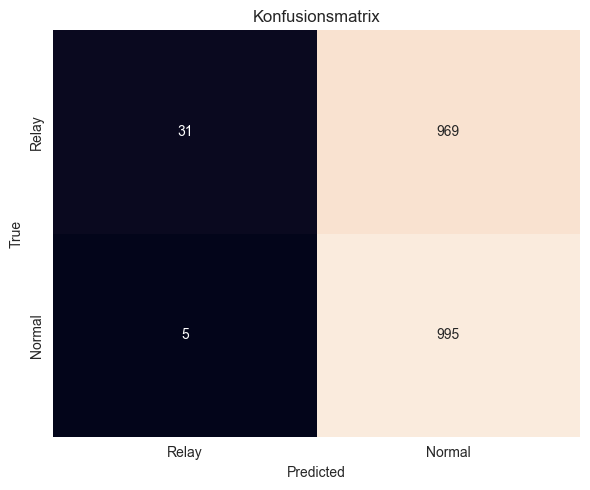

Epoch 1/100, Loss: 248.15951542556286
Epoch 2/100, Loss: 248.29361912608147
Epoch 3/100, Loss: 248.20811673998833
Epoch 4/100, Loss: 248.1918377429247
Epoch 5/100, Loss: 248.19390442967415
Epoch 6/100, Loss: 248.2154349386692
Epoch 7/100, Loss: 248.2349138557911
Epoch 8/100, Loss: 248.14234265685081
Epoch 9/100, Loss: 248.2187024652958
Epoch 10/100, Loss: 248.19459941983223
Epoch 11/100, Loss: 248.13347774744034
Epoch 12/100, Loss: 248.13933753967285
Epoch 13/100, Loss: 248.15863245725632
Epoch 14/100, Loss: 248.1667538881302
Epoch 15/100, Loss: 248.16042444109917
Epoch 16/100, Loss: 248.14941281080246
Epoch 17/100, Loss: 248.2236595004797
Epoch 18/100, Loss: 248.22255343198776
Epoch 19/100, Loss: 248.17745837569237
Epoch 20/100, Loss: 248.14298930764198
Epoch 21/100, Loss: 248.20655263960361
Epoch 22/100, Loss: 248.14454078674316
Epoch 23/100, Loss: 248.17970363795757
Epoch 24/100, Loss: 248.16320192813873
Epoch 25/100, Loss: 248.22001007199287
Epoch 26/100, Loss: 248.15941697359085
E

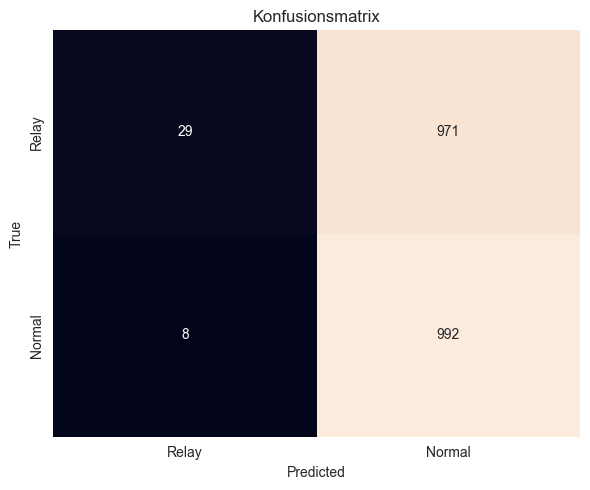

Epoch 1/100, Loss: 330.7717139571905
Epoch 2/100, Loss: 330.7420205324888
Epoch 3/100, Loss: 330.84069837629795
Epoch 4/100, Loss: 330.8462464660406
Epoch 5/100, Loss: 330.73683600127697
Epoch 6/100, Loss: 330.72940784692764
Epoch 7/100, Loss: 330.7257365435362
Epoch 8/100, Loss: 330.7549651712179
Epoch 9/100, Loss: 330.7978852391243
Epoch 10/100, Loss: 330.8142873495817
Epoch 11/100, Loss: 330.835280790925
Epoch 12/100, Loss: 330.7729305922985
Epoch 13/100, Loss: 330.7341432571411
Epoch 14/100, Loss: 330.77955412864685
Epoch 15/100, Loss: 330.72441163659096
Epoch 16/100, Loss: 330.75193467736244
Epoch 17/100, Loss: 330.78601936995983
Epoch 18/100, Loss: 330.71759690344334
Epoch 19/100, Loss: 330.7640241831541
Epoch 20/100, Loss: 330.77966171503067
Epoch 21/100, Loss: 330.72804057598114
Epoch 22/100, Loss: 330.75726108253
Epoch 23/100, Loss: 330.8163258731365
Epoch 24/100, Loss: 330.8496408164501
Epoch 25/100, Loss: 330.88210965692997
Epoch 26/100, Loss: 330.7838355898857
Epoch 27/100,

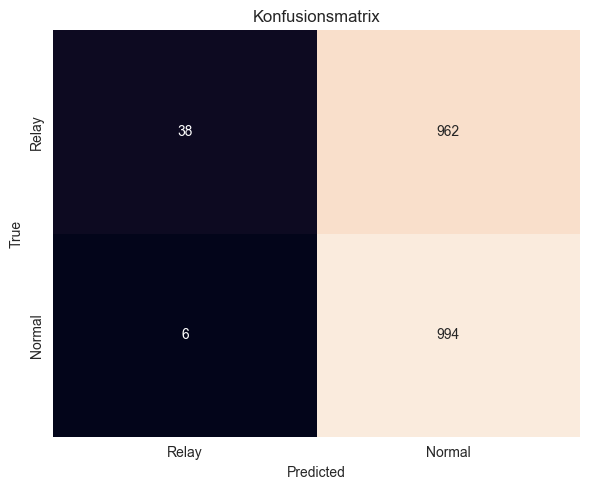

Epoch 1/100, Loss: 644.6020202636719
Epoch 2/100, Loss: 644.7052327990532
Epoch 3/100, Loss: 644.7866351902485
Epoch 4/100, Loss: 644.7727080881596
Epoch 5/100, Loss: 644.7395272254944
Epoch 6/100, Loss: 644.7572385072708
Epoch 7/100, Loss: 644.5588425993919
Epoch 8/100, Loss: 644.5638161897659
Epoch 9/100, Loss: 644.7313190996647
Epoch 10/100, Loss: 644.7594123184681
Epoch 11/100, Loss: 644.619462788105
Epoch 12/100, Loss: 644.5641531944275
Epoch 13/100, Loss: 644.8162086009979
Epoch 14/100, Loss: 644.7861456871033
Epoch 15/100, Loss: 644.7007658183575
Epoch 16/100, Loss: 644.96277987957
Epoch 17/100, Loss: 644.615875184536
Epoch 18/100, Loss: 644.515893727541
Epoch 19/100, Loss: 644.5810644626617
Epoch 20/100, Loss: 644.9030276536942
Epoch 21/100, Loss: 644.7548246085644
Epoch 22/100, Loss: 644.6303368508816
Epoch 23/100, Loss: 644.6344189941883
Epoch 24/100, Loss: 644.7819511294365
Epoch 25/100, Loss: 644.6241036951542
Epoch 26/100, Loss: 644.6383462548256
Epoch 27/100, Loss: 644.63

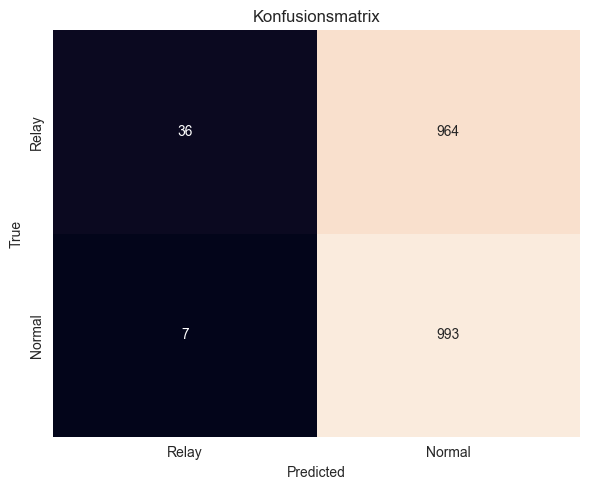

Epoch 1/100, Loss: 618.1532680392265
Epoch 2/100, Loss: 618.1068558096886
Epoch 3/100, Loss: 618.2882564067841
Epoch 4/100, Loss: 618.2990561127663
Epoch 5/100, Loss: 618.3024568557739
Epoch 6/100, Loss: 618.3164066672325
Epoch 7/100, Loss: 618.3359664678574
Epoch 8/100, Loss: 618.1301076412201
Epoch 9/100, Loss: 618.3295831084251
Epoch 10/100, Loss: 618.1709939837456
Epoch 11/100, Loss: 618.2366597056389
Epoch 12/100, Loss: 618.4658036231995
Epoch 13/100, Loss: 618.1731159090996
Epoch 14/100, Loss: 618.3335279226303
Epoch 15/100, Loss: 618.2172980904579
Epoch 16/100, Loss: 618.2520227432251
Epoch 17/100, Loss: 618.2678595781326
Epoch 18/100, Loss: 618.1573265194893
Epoch 19/100, Loss: 618.2783263921738
Epoch 20/100, Loss: 618.1795547008514
Epoch 21/100, Loss: 618.2517441511154
Epoch 22/100, Loss: 618.5338739156723
Epoch 23/100, Loss: 618.4140104651451
Epoch 24/100, Loss: 618.3272204995155
Epoch 25/100, Loss: 618.4547048807144
Epoch 26/100, Loss: 618.1867387294769
Epoch 27/100, Loss: 6

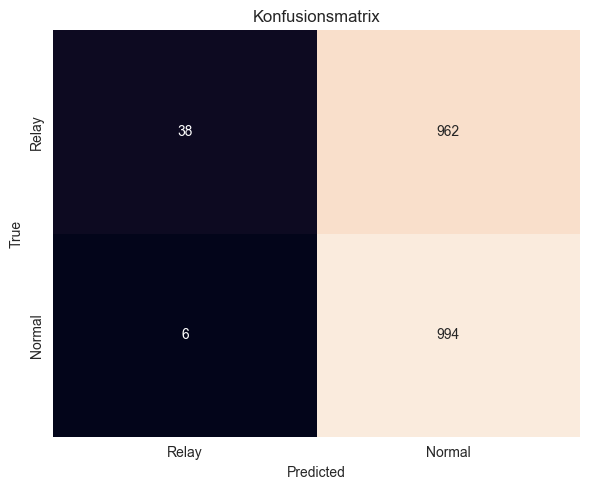

Epoch 1/100, Loss: 687.5252484679222
Epoch 2/100, Loss: 687.494146168232
Epoch 3/100, Loss: 687.5450223088264
Epoch 4/100, Loss: 687.3165240883827
Epoch 5/100, Loss: 687.4652261137962
Epoch 6/100, Loss: 687.6221677660942
Epoch 7/100, Loss: 687.4909096956253
Epoch 8/100, Loss: 687.4063887000084
Epoch 9/100, Loss: 687.7044916152954
Epoch 10/100, Loss: 687.5542731881142
Epoch 11/100, Loss: 687.5048370361328
Epoch 12/100, Loss: 687.4802924990654
Epoch 13/100, Loss: 687.4612003564835
Epoch 14/100, Loss: 687.4312267303467
Epoch 15/100, Loss: 687.4347942173481
Epoch 16/100, Loss: 687.6257240176201
Epoch 17/100, Loss: 687.3062402009964
Epoch 18/100, Loss: 687.5837486684322
Epoch 19/100, Loss: 687.4999454319477
Epoch 20/100, Loss: 687.3998619318008
Epoch 21/100, Loss: 687.5392855107784
Epoch 22/100, Loss: 687.4192191958427
Epoch 23/100, Loss: 687.5923290848732
Epoch 24/100, Loss: 687.489196240902
Epoch 25/100, Loss: 687.5694579482079
Epoch 26/100, Loss: 687.4772690534592
Epoch 27/100, Loss: 687

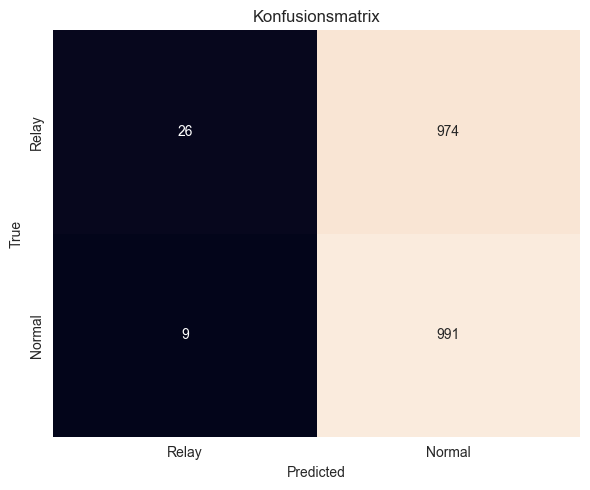

Epoch 1/100, Loss: 911.5420369505882
Epoch 2/100, Loss: 911.5640332698822
Epoch 3/100, Loss: 911.4930030107498
Epoch 4/100, Loss: 911.6603651642799
Epoch 5/100, Loss: 911.6667869091034
Epoch 6/100, Loss: 911.8175415992737
Epoch 7/100, Loss: 911.8955015540123
Epoch 8/100, Loss: 911.7547699809074
Epoch 9/100, Loss: 911.7284849882126
Epoch 10/100, Loss: 911.837053835392
Epoch 11/100, Loss: 911.5822685956955
Epoch 12/100, Loss: 911.711942076683
Epoch 13/100, Loss: 911.8341580629349
Epoch 14/100, Loss: 911.6777908205986
Epoch 15/100, Loss: 911.7384576201439
Epoch 16/100, Loss: 911.5963558554649
Epoch 17/100, Loss: 911.4888781309128
Epoch 18/100, Loss: 911.81314432621
Epoch 19/100, Loss: 911.8542236089706
Epoch 20/100, Loss: 911.6555883288383
Epoch 21/100, Loss: 911.6038199663162
Epoch 22/100, Loss: 911.8808035254478
Epoch 23/100, Loss: 911.9277529716492
Epoch 24/100, Loss: 911.6327263116837
Epoch 25/100, Loss: 911.5989933609962
Epoch 26/100, Loss: 911.6968623399734
Epoch 27/100, Loss: 911.6

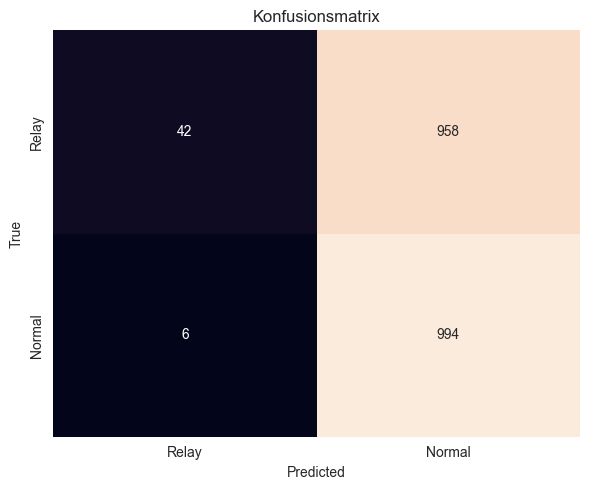

Epoch 1/100, Loss: 1361.7543449401855
Epoch 2/100, Loss: 1362.184081196785
Epoch 3/100, Loss: 1362.0368447303772
Epoch 4/100, Loss: 1361.9414510726929
Epoch 5/100, Loss: 1362.014806985855
Epoch 6/100, Loss: 1361.6853457689285
Epoch 7/100, Loss: 1362.0060118436813
Epoch 8/100, Loss: 1361.7103873491287
Epoch 9/100, Loss: 1361.8619451522827
Epoch 10/100, Loss: 1361.8014421463013
Epoch 11/100, Loss: 1361.6375004649162
Epoch 12/100, Loss: 1361.6797379255295
Epoch 13/100, Loss: 1362.106646180153
Epoch 14/100, Loss: 1361.8061051368713
Epoch 15/100, Loss: 1361.942012667656
Epoch 16/100, Loss: 1361.9340550899506
Epoch 17/100, Loss: 1362.0878056287766
Epoch 18/100, Loss: 1361.7461330890656
Epoch 19/100, Loss: 1362.112804532051
Epoch 20/100, Loss: 1361.9957699775696
Epoch 21/100, Loss: 1362.107179403305
Epoch 22/100, Loss: 1361.9749257564545
Epoch 23/100, Loss: 1361.9000217914581
Epoch 24/100, Loss: 1361.7755113244057
Epoch 25/100, Loss: 1361.8953462839127
Epoch 26/100, Loss: 1361.8276274204254
E

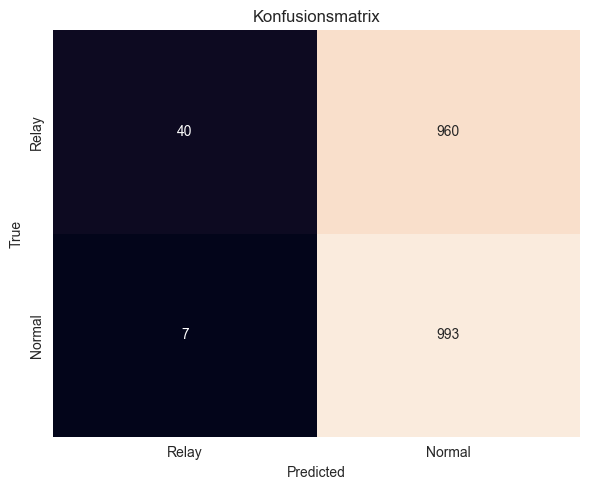

Epoch 1/100, Loss: 887.1353014707565
Epoch 2/100, Loss: 887.2691816091537
Epoch 3/100, Loss: 887.3044066429138
Epoch 4/100, Loss: 887.2736949920654
Epoch 5/100, Loss: 887.1306960582733
Epoch 6/100, Loss: 887.259117603302
Epoch 7/100, Loss: 887.2745689153671
Epoch 8/100, Loss: 887.2218140363693
Epoch 9/100, Loss: 887.199434876442
Epoch 10/100, Loss: 887.2732217311859
Epoch 11/100, Loss: 887.2518930435181
Epoch 12/100, Loss: 887.1433017253876
Epoch 13/100, Loss: 887.431165933609
Epoch 14/100, Loss: 887.2370382547379
Epoch 15/100, Loss: 887.1818774938583
Epoch 16/100, Loss: 887.2032337188721
Epoch 17/100, Loss: 887.2342776060104
Epoch 18/100, Loss: 887.2614179849625
Epoch 19/100, Loss: 887.3921794891357
Epoch 20/100, Loss: 887.2722338438034
Epoch 21/100, Loss: 887.3446428775787
Epoch 22/100, Loss: 887.2816749811172
Epoch 23/100, Loss: 887.1518009901047
Epoch 24/100, Loss: 887.0746924877167
Epoch 25/100, Loss: 887.295600771904
Epoch 26/100, Loss: 887.2161957025528
Epoch 27/100, Loss: 887.1

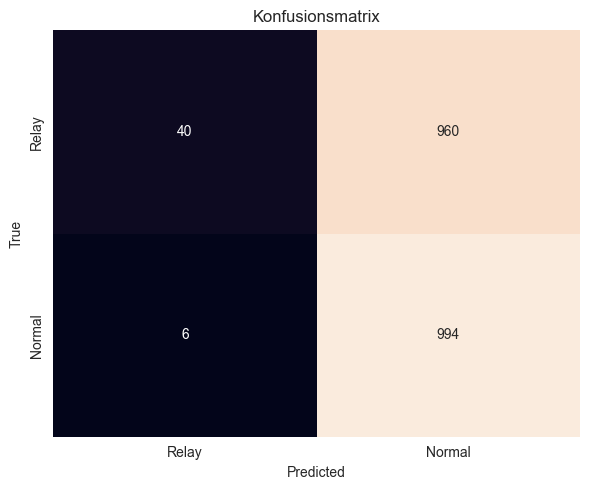

In [5]:
for n in {(64, 32), (128, 64), (256, 128)}:
    for d in {0.01, 0.1, 0.2}:
            clf = DeepSVDD(contamination=0.01, hidden_neurons=n, dropout_rate=d, n_features=72)
            clf.fit(X_train)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neuron {n}")
            print(f"dropout {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()

Epoch 1/250, Loss: 284.13253766298294
Epoch 2/250, Loss: 284.1278986334801
Epoch 3/250, Loss: 284.1114729642868
Epoch 4/250, Loss: 284.15987050533295
Epoch 5/250, Loss: 284.1276856660843
Epoch 6/250, Loss: 284.10692781209946
Epoch 7/250, Loss: 284.1320058107376
Epoch 8/250, Loss: 284.11506789922714
Epoch 9/250, Loss: 284.11804378032684
Epoch 10/250, Loss: 284.0832023024559
Epoch 11/250, Loss: 284.1655422449112
Epoch 12/250, Loss: 284.12897539138794
Epoch 13/250, Loss: 284.12035208940506
Epoch 14/250, Loss: 284.1294122338295
Epoch 15/250, Loss: 284.13065207004547
Epoch 16/250, Loss: 284.1404621601105
Epoch 17/250, Loss: 284.1147959828377
Epoch 18/250, Loss: 284.0960963964462
Epoch 19/250, Loss: 284.10504096746445
Epoch 20/250, Loss: 284.0887516736984
Epoch 21/250, Loss: 284.10097259283066
Epoch 22/250, Loss: 284.1064513325691
Epoch 23/250, Loss: 284.1052942276001
Epoch 24/250, Loss: 284.0843557715416
Epoch 25/250, Loss: 284.14912843704224
Epoch 26/250, Loss: 284.15590518713
Epoch 27/250

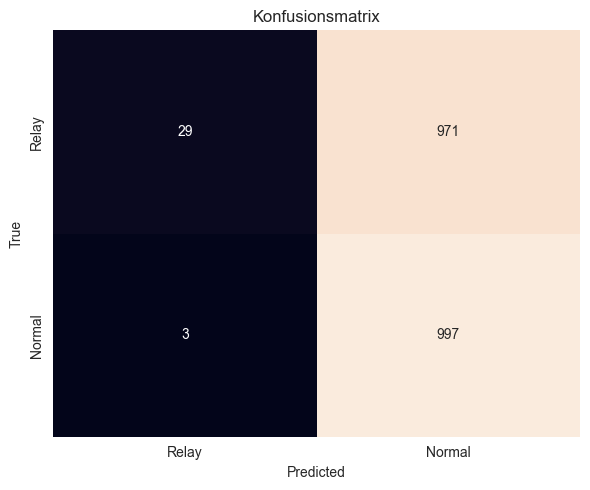

Epoch 1/250, Loss: 278.43680116534233
Epoch 2/250, Loss: 278.35963970422745
Epoch 3/250, Loss: 278.3365887105465
Epoch 4/250, Loss: 278.38979744911194
Epoch 5/250, Loss: 278.34309804439545
Epoch 6/250, Loss: 278.36254221200943
Epoch 7/250, Loss: 278.3470612168312
Epoch 8/250, Loss: 278.4387217462063
Epoch 9/250, Loss: 278.3704550564289
Epoch 10/250, Loss: 278.3219047188759
Epoch 11/250, Loss: 278.34123063087463
Epoch 12/250, Loss: 278.3441534936428
Epoch 13/250, Loss: 278.3692823648453
Epoch 14/250, Loss: 278.304873496294
Epoch 15/250, Loss: 278.3180865943432
Epoch 16/250, Loss: 278.32216519117355
Epoch 17/250, Loss: 278.3087034225464
Epoch 18/250, Loss: 278.34823870658875
Epoch 19/250, Loss: 278.30429297685623
Epoch 20/250, Loss: 278.3478431403637
Epoch 21/250, Loss: 278.305572450161
Epoch 22/250, Loss: 278.31593438982964
Epoch 23/250, Loss: 278.319436609745
Epoch 24/250, Loss: 278.3640521764755
Epoch 25/250, Loss: 278.3629979789257
Epoch 26/250, Loss: 278.34053859114647
Epoch 27/250,

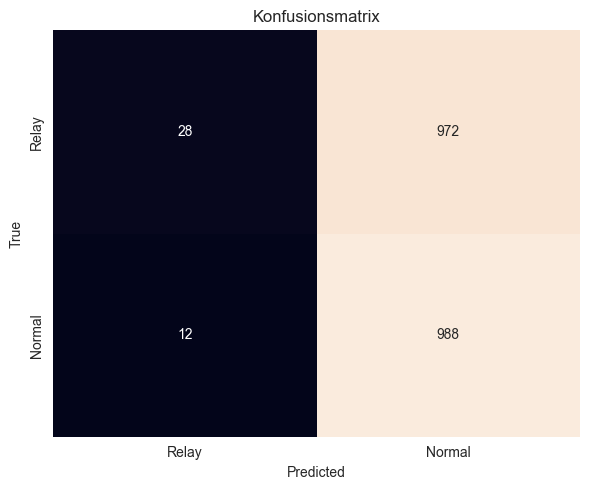

Epoch 1/250, Loss: 321.1190089583397
Epoch 2/250, Loss: 321.10510471463203
Epoch 3/250, Loss: 321.1244614124298
Epoch 4/250, Loss: 321.1152753531933
Epoch 5/250, Loss: 321.12641982734203
Epoch 6/250, Loss: 321.3003933131695
Epoch 7/250, Loss: 321.1972701996565
Epoch 8/250, Loss: 321.1004276126623
Epoch 9/250, Loss: 321.196818575263
Epoch 10/250, Loss: 321.116801276803
Epoch 11/250, Loss: 321.18614986538887
Epoch 12/250, Loss: 321.1505543887615
Epoch 13/250, Loss: 321.18647050857544
Epoch 14/250, Loss: 321.1501710563898
Epoch 15/250, Loss: 321.1363499611616
Epoch 16/250, Loss: 321.2354542016983
Epoch 17/250, Loss: 321.07958640158176
Epoch 18/250, Loss: 321.1890902519226
Epoch 19/250, Loss: 321.18862840533257
Epoch 20/250, Loss: 321.1175446212292
Epoch 21/250, Loss: 321.0563655793667
Epoch 22/250, Loss: 321.13394679129124
Epoch 23/250, Loss: 321.1225968748331
Epoch 24/250, Loss: 321.12703604996204
Epoch 25/250, Loss: 321.1136008799076
Epoch 26/250, Loss: 321.1604096889496
Epoch 27/250, L

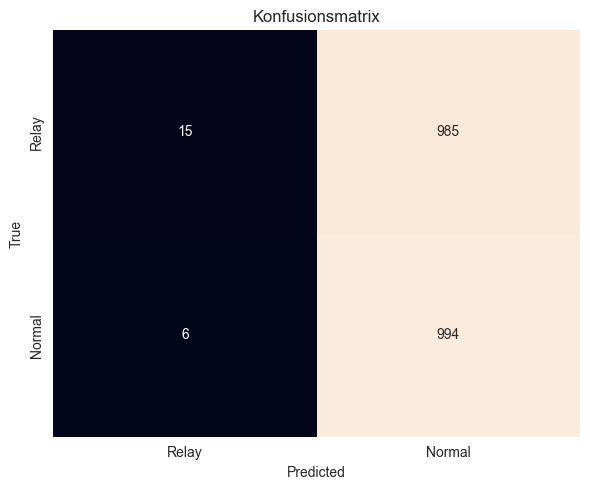

Epoch 1/250, Loss: 546.744125187397
Epoch 2/250, Loss: 546.6423027515411
Epoch 3/250, Loss: 546.8043049871922
Epoch 4/250, Loss: 546.840825676918
Epoch 5/250, Loss: 546.7335950434208
Epoch 6/250, Loss: 546.7351625561714
Epoch 7/250, Loss: 546.7000747323036
Epoch 8/250, Loss: 546.5916324853897
Epoch 9/250, Loss: 546.7016091346741
Epoch 10/250, Loss: 546.6523185372353
Epoch 11/250, Loss: 546.7707758545876
Epoch 12/250, Loss: 546.8228433728218
Epoch 13/250, Loss: 546.7175598442554
Epoch 14/250, Loss: 546.8458474874496
Epoch 15/250, Loss: 546.6655360758305
Epoch 16/250, Loss: 546.8887149095535
Epoch 17/250, Loss: 546.6800756454468
Epoch 18/250, Loss: 546.919880926609
Epoch 19/250, Loss: 546.6270892620087
Epoch 20/250, Loss: 546.82355260849
Epoch 21/250, Loss: 546.7449626326561
Epoch 22/250, Loss: 546.6536244750023
Epoch 23/250, Loss: 547.0654478669167
Epoch 24/250, Loss: 546.7447949051857
Epoch 25/250, Loss: 546.7119019031525
Epoch 26/250, Loss: 546.7122809290886
Epoch 27/250, Loss: 546.73

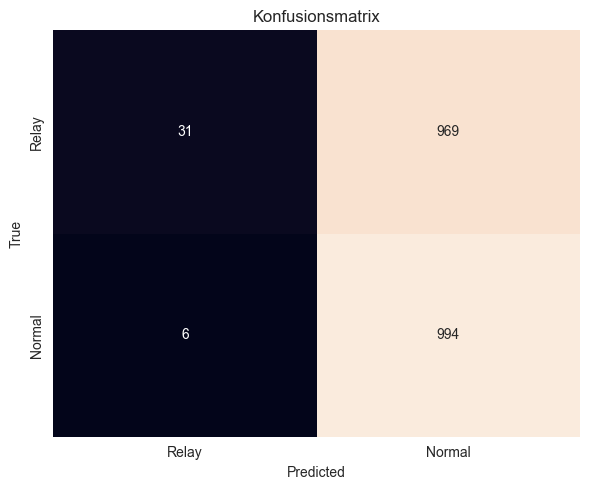

Epoch 1/250, Loss: 403.5672365427017
Epoch 2/250, Loss: 403.6672564148903
Epoch 3/250, Loss: 403.6021898984909
Epoch 4/250, Loss: 403.66378420591354
Epoch 5/250, Loss: 403.6272959411144
Epoch 6/250, Loss: 403.57897049188614
Epoch 7/250, Loss: 403.63883250951767
Epoch 8/250, Loss: 403.5969368815422
Epoch 9/250, Loss: 403.5644231438637
Epoch 10/250, Loss: 403.6927556693554
Epoch 11/250, Loss: 403.6659875512123
Epoch 12/250, Loss: 403.57949513196945
Epoch 13/250, Loss: 403.584124147892
Epoch 14/250, Loss: 403.54568043351173
Epoch 15/250, Loss: 403.6225271821022
Epoch 16/250, Loss: 403.6455306112766
Epoch 17/250, Loss: 403.5713867545128
Epoch 18/250, Loss: 403.6222822666168
Epoch 19/250, Loss: 403.7169447541237
Epoch 20/250, Loss: 403.5941573381424
Epoch 21/250, Loss: 403.5594590306282
Epoch 22/250, Loss: 403.5840048491955
Epoch 23/250, Loss: 403.619437456131
Epoch 24/250, Loss: 403.5164832174778
Epoch 25/250, Loss: 403.54256242513657
Epoch 26/250, Loss: 403.62364023923874
Epoch 27/250, Lo

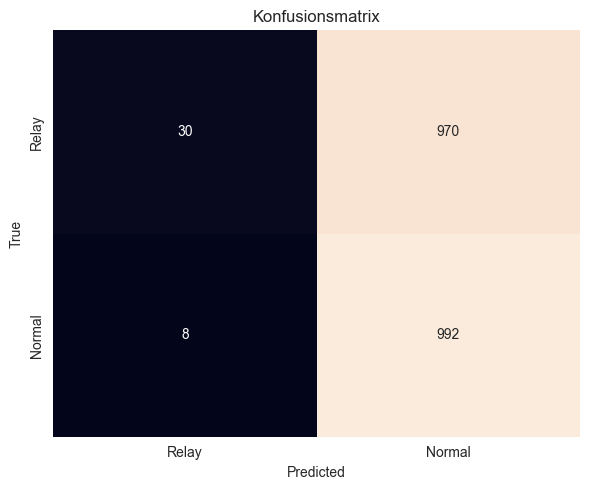

Epoch 1/250, Loss: 465.98343539237976
Epoch 2/250, Loss: 466.0029501914978
Epoch 3/250, Loss: 466.0134182572365
Epoch 4/250, Loss: 465.9860668182373
Epoch 5/250, Loss: 466.0342373251915
Epoch 6/250, Loss: 465.9687945842743
Epoch 7/250, Loss: 465.9926322698593
Epoch 8/250, Loss: 465.96142852306366
Epoch 9/250, Loss: 466.02444964647293
Epoch 10/250, Loss: 466.0502204298973
Epoch 11/250, Loss: 465.9724673628807
Epoch 12/250, Loss: 466.00000101327896
Epoch 13/250, Loss: 465.9793677330017
Epoch 14/250, Loss: 466.0379732847214
Epoch 15/250, Loss: 466.0398672223091
Epoch 16/250, Loss: 465.9381090402603
Epoch 17/250, Loss: 466.0929815173149
Epoch 18/250, Loss: 466.00452756881714
Epoch 19/250, Loss: 465.99824380874634
Epoch 20/250, Loss: 466.0699030160904
Epoch 21/250, Loss: 466.00533401966095
Epoch 22/250, Loss: 466.01882553100586
Epoch 23/250, Loss: 465.9231727719307
Epoch 24/250, Loss: 466.08878058195114
Epoch 25/250, Loss: 466.0804279446602
Epoch 26/250, Loss: 465.95183104276657
Epoch 27/25

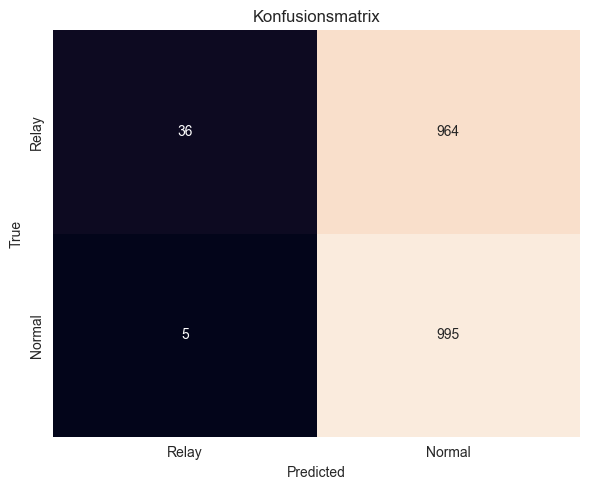

Epoch 1/250, Loss: 1183.5303002595901
Epoch 2/250, Loss: 1183.4259841442108
Epoch 3/250, Loss: 1183.1054795980453
Epoch 4/250, Loss: 1183.109910607338
Epoch 5/250, Loss: 1183.383274435997
Epoch 6/250, Loss: 1183.555320739746
Epoch 7/250, Loss: 1183.596556186676
Epoch 8/250, Loss: 1183.2374413013458
Epoch 9/250, Loss: 1183.6104321479797
Epoch 10/250, Loss: 1183.2663729190826
Epoch 11/250, Loss: 1183.1662547588348
Epoch 12/250, Loss: 1183.7024710178375
Epoch 13/250, Loss: 1183.3077046871185
Epoch 14/250, Loss: 1183.6661573648453
Epoch 15/250, Loss: 1183.4863533973694
Epoch 16/250, Loss: 1183.4912925958633
Epoch 17/250, Loss: 1183.3318808078766
Epoch 18/250, Loss: 1183.4597308635712
Epoch 19/250, Loss: 1183.2534794807434
Epoch 20/250, Loss: 1183.3665687441826
Epoch 21/250, Loss: 1183.5595469474792
Epoch 22/250, Loss: 1183.603266954422
Epoch 23/250, Loss: 1183.7060261964798
Epoch 24/250, Loss: 1183.2790806293488
Epoch 25/250, Loss: 1183.52394592762
Epoch 26/250, Loss: 1183.1704139709473
Ep

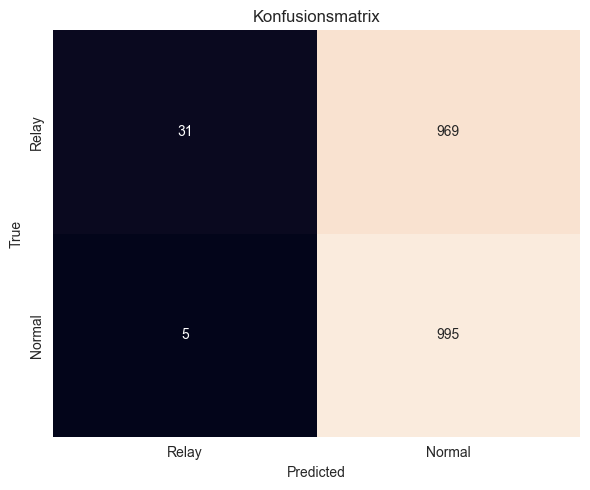

Epoch 1/250, Loss: 1027.8674615621567
Epoch 2/250, Loss: 1027.9311621189117
Epoch 3/250, Loss: 1028.0701659917831
Epoch 4/250, Loss: 1027.9445841312408
Epoch 5/250, Loss: 1028.0600754022598
Epoch 6/250, Loss: 1028.029718875885
Epoch 7/250, Loss: 1027.913051724434
Epoch 8/250, Loss: 1028.1390215158463
Epoch 9/250, Loss: 1027.7856755256653
Epoch 10/250, Loss: 1027.715828537941
Epoch 11/250, Loss: 1027.817857503891
Epoch 12/250, Loss: 1027.9671595096588
Epoch 13/250, Loss: 1028.0245686769485
Epoch 14/250, Loss: 1027.7922085523605
Epoch 15/250, Loss: 1027.8674478530884
Epoch 16/250, Loss: 1027.8576629161835
Epoch 17/250, Loss: 1027.901792883873
Epoch 18/250, Loss: 1028.1798429489136
Epoch 19/250, Loss: 1028.0863177776337
Epoch 20/250, Loss: 1028.223329782486
Epoch 21/250, Loss: 1027.9364339113235
Epoch 22/250, Loss: 1027.9158622026443
Epoch 23/250, Loss: 1027.890195965767
Epoch 24/250, Loss: 1027.8174372911453
Epoch 25/250, Loss: 1027.9371982812881
Epoch 26/250, Loss: 1027.6916208267212
Ep

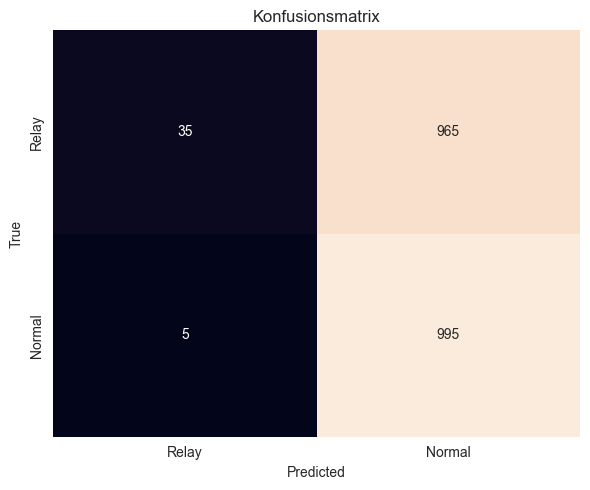

Epoch 1/250, Loss: 1076.1769123077393
Epoch 2/250, Loss: 1076.3392578959465
Epoch 3/250, Loss: 1076.024068236351
Epoch 4/250, Loss: 1076.088141322136
Epoch 5/250, Loss: 1076.249905526638
Epoch 6/250, Loss: 1076.200367808342
Epoch 7/250, Loss: 1076.1977912187576
Epoch 8/250, Loss: 1076.1955765485764
Epoch 9/250, Loss: 1076.5027294158936
Epoch 10/250, Loss: 1076.349167227745
Epoch 11/250, Loss: 1076.0148230195045
Epoch 12/250, Loss: 1076.1758276224136
Epoch 13/250, Loss: 1076.3288480043411
Epoch 14/250, Loss: 1076.2422975301743
Epoch 15/250, Loss: 1076.0687407255173
Epoch 16/250, Loss: 1076.1873719096184
Epoch 17/250, Loss: 1076.015398144722
Epoch 18/250, Loss: 1076.456916987896
Epoch 19/250, Loss: 1076.0815923213959
Epoch 20/250, Loss: 1076.2552919387817
Epoch 21/250, Loss: 1076.1815427541733
Epoch 22/250, Loss: 1076.2487057447433
Epoch 23/250, Loss: 1076.144844174385
Epoch 24/250, Loss: 1076.223635673523
Epoch 25/250, Loss: 1076.0923784971237
Epoch 26/250, Loss: 1076.423698425293
Epoch

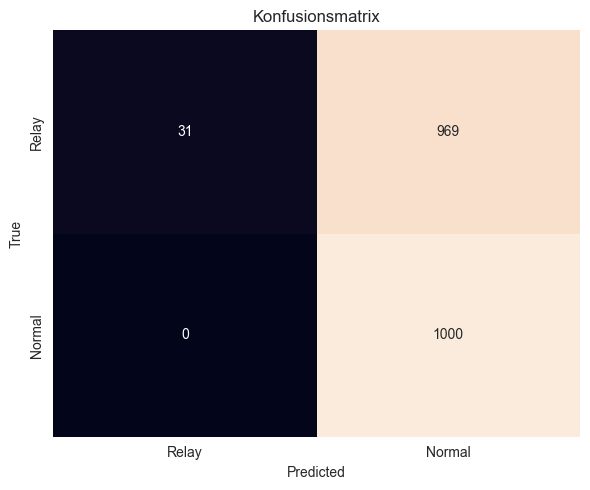

In [6]:
for n in {(64, 32), (128, 64), (256, 128)}:
    for d in {0.1, 0.2, 0.3}:
            clf = DeepSVDD(contamination=0.01, hidden_neurons=n, dropout_rate=d, n_features=72, epochs=250)
            clf.fit(X_train_scaled_standard)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined_scaled_standard)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neuron {n}")
            print(f"dropout {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()

Epoch 1/100, Loss: 311.3414680659771
Epoch 2/100, Loss: 311.3256567120552
Epoch 3/100, Loss: 311.2851243019104
Epoch 4/100, Loss: 311.2435094714165
Epoch 5/100, Loss: 311.2930563688278
Epoch 6/100, Loss: 311.2478228211403
Epoch 7/100, Loss: 311.2804791033268
Epoch 8/100, Loss: 311.25425413250923
Epoch 9/100, Loss: 311.2228100299835
Epoch 10/100, Loss: 311.2442681491375
Epoch 11/100, Loss: 311.23359113931656
Epoch 12/100, Loss: 311.2399933338165
Epoch 13/100, Loss: 311.3631649017334
Epoch 14/100, Loss: 311.23432767391205
Epoch 15/100, Loss: 311.3053787648678
Epoch 16/100, Loss: 311.2950057387352
Epoch 17/100, Loss: 311.2878158688545
Epoch 18/100, Loss: 311.2701795101166
Epoch 19/100, Loss: 311.33336314558983
Epoch 20/100, Loss: 311.2458776831627
Epoch 21/100, Loss: 311.2335299551487
Epoch 22/100, Loss: 311.2400802075863
Epoch 23/100, Loss: 311.316731095314
Epoch 24/100, Loss: 311.23082450032234
Epoch 25/100, Loss: 311.212243527174
Epoch 26/100, Loss: 311.28887817263603
Epoch 27/100, Los

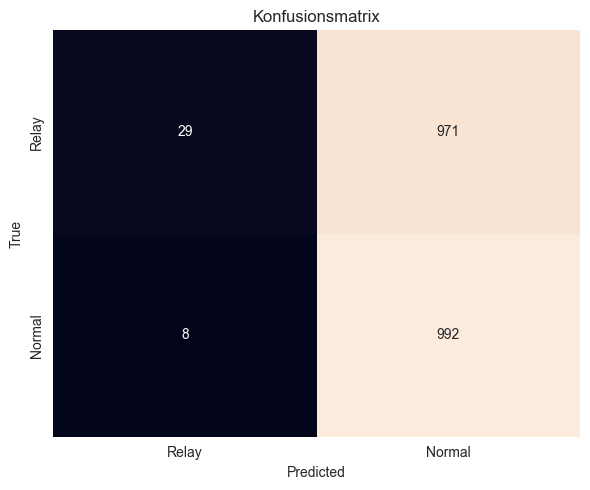

Epoch 1/100, Loss: 277.1178404390812
Epoch 2/100, Loss: 277.08756521344185
Epoch 3/100, Loss: 277.113518089056
Epoch 4/100, Loss: 277.05546620488167
Epoch 5/100, Loss: 277.08765012025833
Epoch 6/100, Loss: 277.02424070239067
Epoch 7/100, Loss: 277.1082644164562
Epoch 8/100, Loss: 277.07628494501114
Epoch 9/100, Loss: 277.01829555630684
Epoch 10/100, Loss: 277.0253236889839
Epoch 11/100, Loss: 277.11504831910133
Epoch 12/100, Loss: 277.0628392994404
Epoch 13/100, Loss: 277.08331885933876
Epoch 14/100, Loss: 277.07004112005234
Epoch 15/100, Loss: 277.0379620194435
Epoch 16/100, Loss: 277.07751739025116
Epoch 17/100, Loss: 277.06094631552696
Epoch 18/100, Loss: 277.04994800686836
Epoch 19/100, Loss: 277.0464174449444
Epoch 20/100, Loss: 277.066864579916
Epoch 21/100, Loss: 277.0435199737549
Epoch 22/100, Loss: 277.0599032640457
Epoch 23/100, Loss: 277.0469255745411
Epoch 24/100, Loss: 277.0993466079235
Epoch 25/100, Loss: 277.08491879701614
Epoch 26/100, Loss: 277.0821948647499
Epoch 27/1

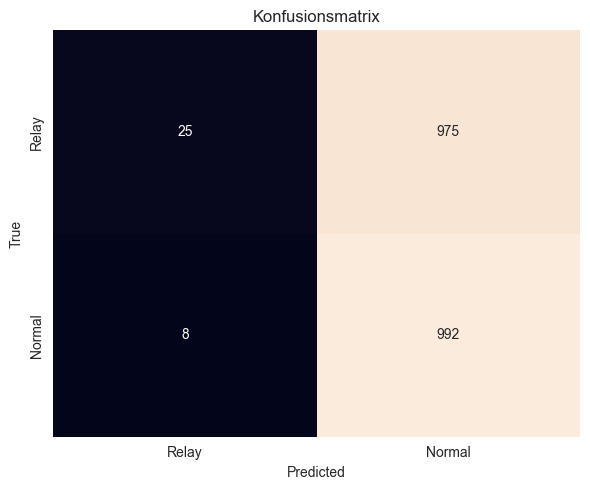

Epoch 1/100, Loss: 152.61394211649895
Epoch 2/100, Loss: 152.61153411865234
Epoch 3/100, Loss: 152.57773730158806
Epoch 4/100, Loss: 152.60297751426697
Epoch 5/100, Loss: 152.58242598176003
Epoch 6/100, Loss: 152.5882166326046
Epoch 7/100, Loss: 152.59839841723442
Epoch 8/100, Loss: 152.60555228590965
Epoch 9/100, Loss: 152.6195105612278
Epoch 10/100, Loss: 152.58973237872124
Epoch 11/100, Loss: 152.57979533076286
Epoch 12/100, Loss: 152.62922781705856
Epoch 13/100, Loss: 152.58058801293373
Epoch 14/100, Loss: 152.59138706326485
Epoch 15/100, Loss: 152.57868611812592
Epoch 16/100, Loss: 152.58789438009262
Epoch 17/100, Loss: 152.58433559536934
Epoch 18/100, Loss: 152.5897146165371
Epoch 19/100, Loss: 152.61847952008247
Epoch 20/100, Loss: 152.58874255418777
Epoch 21/100, Loss: 152.59293514490128
Epoch 22/100, Loss: 152.59346863627434
Epoch 23/100, Loss: 152.60441783070564
Epoch 24/100, Loss: 152.61321207880974
Epoch 25/100, Loss: 152.5913393497467
Epoch 26/100, Loss: 152.6076146364212


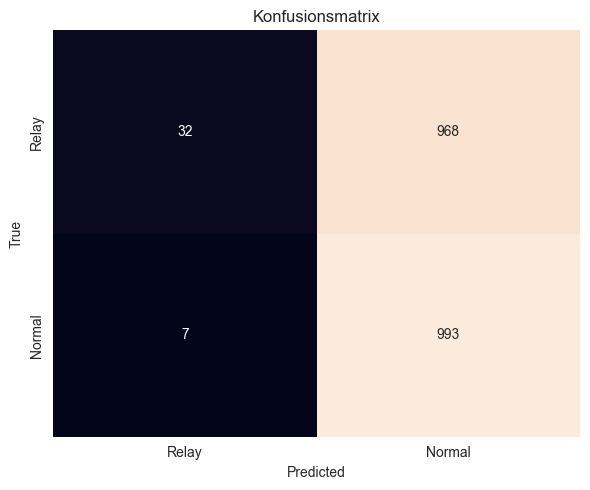

Epoch 1/100, Loss: 611.7429899573326
Epoch 2/100, Loss: 611.6556661128998
Epoch 3/100, Loss: 611.6199753880501
Epoch 4/100, Loss: 611.7458554506302
Epoch 5/100, Loss: 611.711435854435
Epoch 6/100, Loss: 611.561025261879
Epoch 7/100, Loss: 611.6597413420677
Epoch 8/100, Loss: 611.7589179873466
Epoch 9/100, Loss: 611.6479511857033
Epoch 10/100, Loss: 611.7421290278435
Epoch 11/100, Loss: 611.6216061711311
Epoch 12/100, Loss: 611.652979195118
Epoch 13/100, Loss: 611.642913043499
Epoch 14/100, Loss: 611.7018443346024
Epoch 15/100, Loss: 611.5609597563744
Epoch 16/100, Loss: 611.7430100440979
Epoch 17/100, Loss: 611.7633396983147
Epoch 18/100, Loss: 611.8541540503502
Epoch 19/100, Loss: 611.7120409011841
Epoch 20/100, Loss: 611.8080410957336
Epoch 21/100, Loss: 611.7223491668701
Epoch 22/100, Loss: 611.7019480466843
Epoch 23/100, Loss: 611.7258760333061
Epoch 24/100, Loss: 611.8383660316467
Epoch 25/100, Loss: 611.8122376203537
Epoch 26/100, Loss: 611.7042431235313
Epoch 27/100, Loss: 611.6

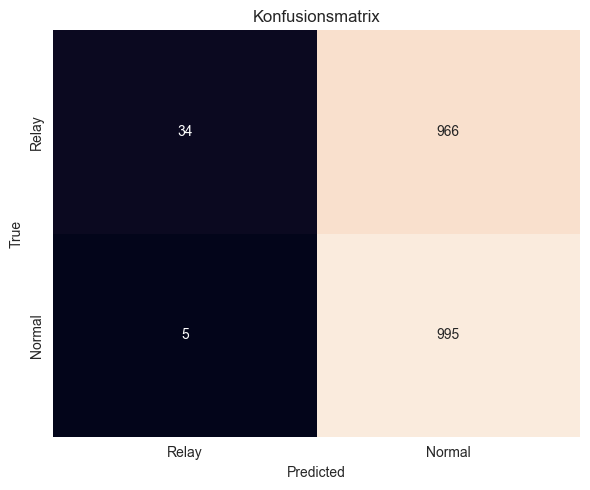

Epoch 1/100, Loss: 475.8413875102997
Epoch 2/100, Loss: 475.9132011830807
Epoch 3/100, Loss: 475.78566870093346
Epoch 4/100, Loss: 475.8935889303684
Epoch 5/100, Loss: 475.85895350575447
Epoch 6/100, Loss: 475.9170145690441
Epoch 7/100, Loss: 475.81399458646774
Epoch 8/100, Loss: 475.92280182242393
Epoch 9/100, Loss: 475.93174263834953
Epoch 10/100, Loss: 475.8537417650223
Epoch 11/100, Loss: 475.8771066069603
Epoch 12/100, Loss: 475.88525491952896
Epoch 13/100, Loss: 475.84451696276665
Epoch 14/100, Loss: 475.78019547462463
Epoch 15/100, Loss: 475.7358789741993
Epoch 16/100, Loss: 475.79838678240776
Epoch 17/100, Loss: 475.88061609864235
Epoch 18/100, Loss: 475.905682682991
Epoch 19/100, Loss: 475.7924711406231
Epoch 20/100, Loss: 475.8412546813488
Epoch 21/100, Loss: 475.8863081037998
Epoch 22/100, Loss: 475.90793338418007
Epoch 23/100, Loss: 476.05211770534515
Epoch 24/100, Loss: 475.85953226685524
Epoch 25/100, Loss: 475.9517643749714
Epoch 26/100, Loss: 475.7679197192192
Epoch 27/

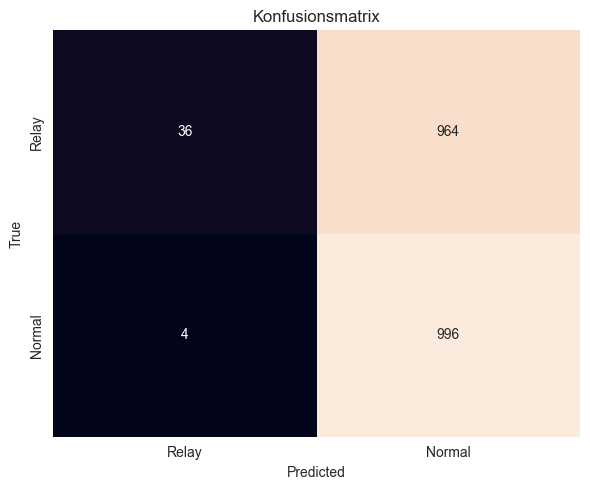

Epoch 1/100, Loss: 407.71317982673645
Epoch 2/100, Loss: 407.6949212253094
Epoch 3/100, Loss: 407.6246709227562
Epoch 4/100, Loss: 407.7243107557297
Epoch 5/100, Loss: 407.70332607626915
Epoch 6/100, Loss: 407.77382427453995
Epoch 7/100, Loss: 407.6678366959095
Epoch 8/100, Loss: 407.65240424871445
Epoch 9/100, Loss: 407.76578399538994
Epoch 10/100, Loss: 407.69407445192337
Epoch 11/100, Loss: 407.6987914443016
Epoch 12/100, Loss: 407.6991294324398
Epoch 13/100, Loss: 407.6253116428852
Epoch 14/100, Loss: 407.6415790319443
Epoch 15/100, Loss: 407.74836522340775
Epoch 16/100, Loss: 407.73611667752266
Epoch 17/100, Loss: 407.7411094009876
Epoch 18/100, Loss: 407.62119495868683
Epoch 19/100, Loss: 407.67031195759773
Epoch 20/100, Loss: 407.7621336579323
Epoch 21/100, Loss: 407.63632303476334
Epoch 22/100, Loss: 407.65102049708366
Epoch 23/100, Loss: 407.7747295200825
Epoch 24/100, Loss: 407.69776633381844
Epoch 25/100, Loss: 407.6104390025139
Epoch 26/100, Loss: 407.6439983844757
Epoch 27

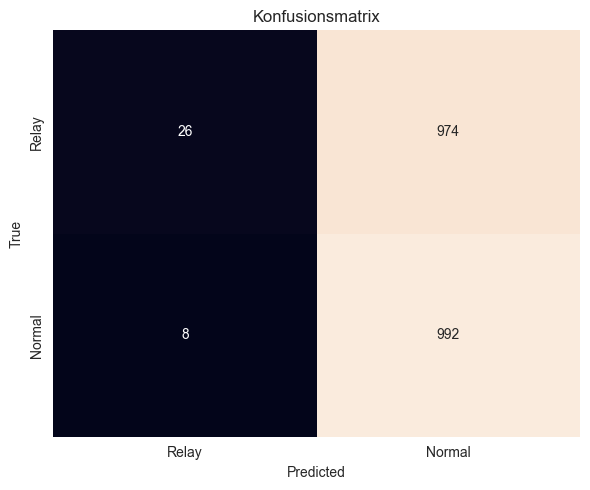

Epoch 1/100, Loss: 1370.1093027591705
Epoch 2/100, Loss: 1369.4677286148071
Epoch 3/100, Loss: 1369.470575451851
Epoch 4/100, Loss: 1369.6321376562119
Epoch 5/100, Loss: 1369.8447256088257
Epoch 6/100, Loss: 1369.4903213977814
Epoch 7/100, Loss: 1369.533136844635
Epoch 8/100, Loss: 1369.9969639778137
Epoch 9/100, Loss: 1369.9805263280869
Epoch 10/100, Loss: 1369.488734960556
Epoch 11/100, Loss: 1369.5967968702316
Epoch 12/100, Loss: 1369.8405561447144
Epoch 13/100, Loss: 1369.623038649559
Epoch 14/100, Loss: 1369.7034176588058
Epoch 15/100, Loss: 1369.3182964324951
Epoch 16/100, Loss: 1369.7280620336533
Epoch 17/100, Loss: 1369.471389889717
Epoch 18/100, Loss: 1369.4042754173279
Epoch 19/100, Loss: 1370.0901641845703
Epoch 20/100, Loss: 1369.7593867778778
Epoch 21/100, Loss: 1369.9045196771622
Epoch 22/100, Loss: 1369.8224452733994
Epoch 23/100, Loss: 1369.929377913475
Epoch 24/100, Loss: 1370.1068363189697
Epoch 25/100, Loss: 1369.7784050703049
Epoch 26/100, Loss: 1369.5401281118393
E

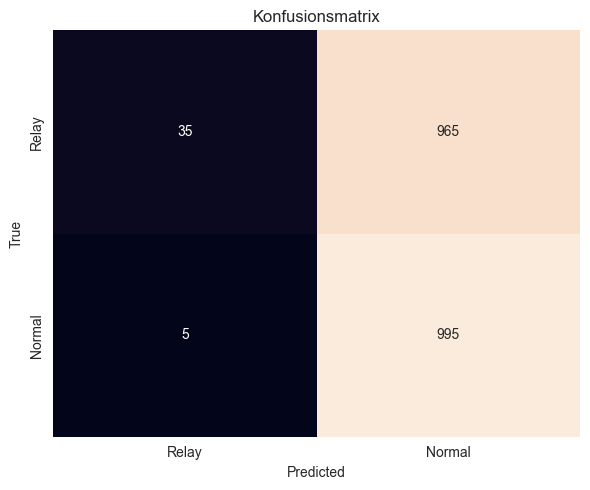

Epoch 1/100, Loss: 975.4853141307831
Epoch 2/100, Loss: 975.4489630460739
Epoch 3/100, Loss: 975.3130881786346
Epoch 4/100, Loss: 975.4649595022202
Epoch 5/100, Loss: 975.3567287921906
Epoch 6/100, Loss: 975.5225553512573
Epoch 7/100, Loss: 975.5051414966583
Epoch 8/100, Loss: 975.5956801176071
Epoch 9/100, Loss: 975.4552335739136
Epoch 10/100, Loss: 975.3992956876755
Epoch 11/100, Loss: 975.6920123100281
Epoch 12/100, Loss: 975.343829870224
Epoch 13/100, Loss: 975.5454226732254
Epoch 14/100, Loss: 975.6361652612686
Epoch 15/100, Loss: 975.5937439203262
Epoch 16/100, Loss: 975.4880380630493
Epoch 17/100, Loss: 975.4837166070938
Epoch 18/100, Loss: 975.5831919908524
Epoch 19/100, Loss: 975.4765187501907
Epoch 20/100, Loss: 975.434690117836
Epoch 21/100, Loss: 975.320305109024
Epoch 22/100, Loss: 975.4647967815399
Epoch 23/100, Loss: 975.4503802061081
Epoch 24/100, Loss: 975.3689955472946
Epoch 25/100, Loss: 975.4357752799988
Epoch 26/100, Loss: 975.5866307020187
Epoch 27/100, Loss: 975.

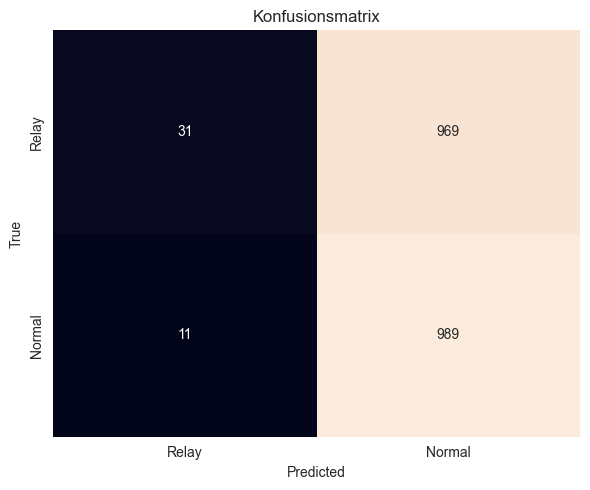

Epoch 1/100, Loss: 1077.2016056776047
Epoch 2/100, Loss: 1076.9306946992874
Epoch 3/100, Loss: 1076.8885414600372
Epoch 4/100, Loss: 1077.0209208726883
Epoch 5/100, Loss: 1077.3684579730034
Epoch 6/100, Loss: 1077.0166028738022
Epoch 7/100, Loss: 1077.217459321022
Epoch 8/100, Loss: 1076.9033962488174
Epoch 9/100, Loss: 1077.080536365509
Epoch 10/100, Loss: 1077.0174656510353
Epoch 11/100, Loss: 1077.1814569234848
Epoch 12/100, Loss: 1076.8078578710556
Epoch 13/100, Loss: 1077.0574009418488
Epoch 14/100, Loss: 1076.9238025546074
Epoch 15/100, Loss: 1076.9518234729767
Epoch 16/100, Loss: 1076.770868897438
Epoch 17/100, Loss: 1076.9512261152267
Epoch 18/100, Loss: 1076.8129043579102
Epoch 19/100, Loss: 1076.9480862021446
Epoch 20/100, Loss: 1077.2553609609604
Epoch 21/100, Loss: 1076.8756848573685
Epoch 22/100, Loss: 1077.2221858501434
Epoch 23/100, Loss: 1077.3180488348007
Epoch 24/100, Loss: 1077.2094111442566
Epoch 25/100, Loss: 1077.026572227478
Epoch 26/100, Loss: 1076.8870397210121

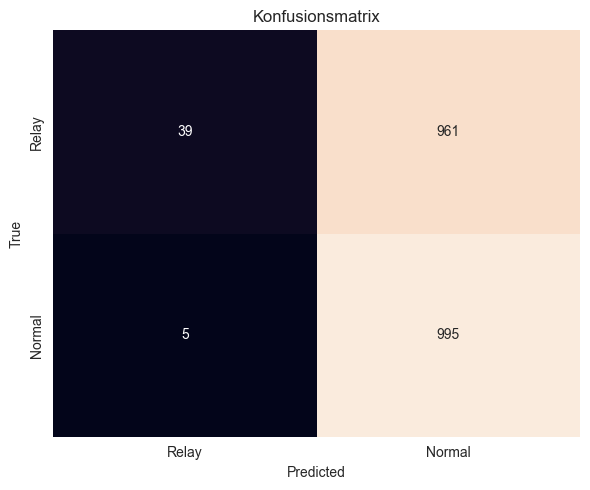

In [7]:
for n in {(64, 32), (128, 64), (256, 128)}:
    for d in {0.01, 0.1, 0.2}:
        clf = DeepSVDD(contamination=0.01, hidden_neurons=n, dropout_rate=d, n_features=72)
        clf.fit(X_train_scaled_minmax)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled_minmax)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"hidden neuron {n}")
        print(f"dropout {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()